In [14]:
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import matplotlib.pyplot as plt
import numpy as np
import random

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation
from keras.datasets import cifar10
from keras import optimizers

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
# x_train = x_train.reshape((50000,32*32*3))
# x_test = x_test.reshape((10000,32*32*3))

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [7]:
print(y_train.shape)
print(y_train[:10])

(50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


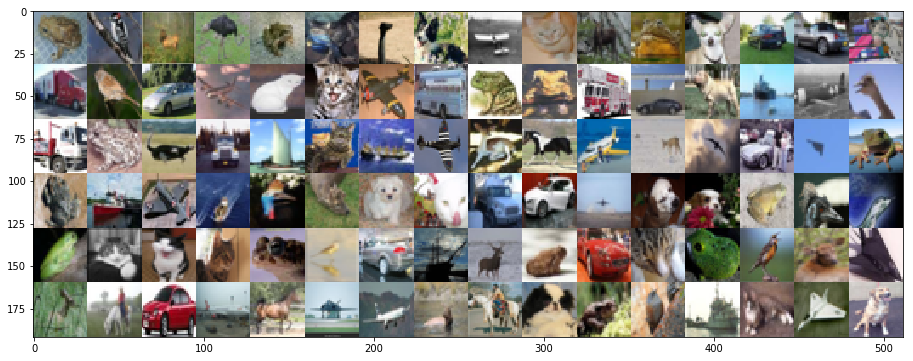

In [8]:
samples = np.concatenate(
    [np.concatenate(
        [x_train[i].reshape((32,32,3)) for i in [int(random.random() * len(x_train)) for i in range(16)]], axis=1) 
     for i in range(6)], axis=0)
plt.figure(figsize=(16,6))
plt.imshow(samples, cmap='gray')

In [45]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(48, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(48, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(80, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(80, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(80, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(80, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(80, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_96 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_97 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_98 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 32, 32, 48)        13872     
__________

In [46]:
opt = keras.optimizers.Adam(lr=0.0001)

model.compile(loss='categorical_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, 
          batch_size=32, 
          epochs=50, 
          verbose=1, 
          shuffle=True,
          validation_data=(x_test, y_test))

## Result Record
---

### Full Dense Layers

Train on 50000 samples, validate on 10000 samples

Epoch 50/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7081 - acc: 0.3995 - val_loss: 1.7047 - val_acc: 0.3993

### Convolution / Sigmoid / SGD : BatchSize = 128 / Epochs = 50
Here it's experiencing a "Vanishing Gradiant"

Epoch 50/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.1078 - acc: 0.2444 - val_loss: 2.0924 - val_acc: 0.2544

### Convolution / ReLU / SGD : BatchSize = 128 / Epochs = 50

Epoch 50/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.5681 - acc: 0.8036 - val_loss: 1.0424 - val_acc: 0.6663

### Convolution / Dropout / ReLU / Adam : BatchSize = 128 / Epochs = 100

Epoch 100/100
50000/50000 [==============================] - 7s 132us/step - loss: 0.5228 - acc: 0.8179 - val_loss: 0.7573 - val_acc: 0.7481

### Convolution / Dropout / ReLU / SGD : BatchSize = 128 / Epochs = 100
while sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

Epoch 100/100
50000/50000 [==============================] - 6s 126us/step - loss: 0.4307 - acc: 0.8493 - val_loss: 0.7879 - val_acc: 0.7496

### Convolution / Dropout / ReLU / RMSprop : BatchSize = 128 / Epochs = 100

Epoch 100/100
50000/50000 [==============================] - 6s 128us/step - loss: 0.5515 - acc: 0.8136 - val_loss: 0.8343 - val_acc: 0.7281


### 9 Convolutions / Dropout / ReLU / Adam : BatchSize = 128 / Epochs = 100

Epoch 100/100
50000/50000 [==============================] - 8s 155us/step - loss: 0.3844 - acc: 0.8732 - val_loss: 0.5588 - val_acc: 0.8343

### 13 Convolution Layers / Dropout / ReLU / Adam : BatchSize = 128 / Epochs = 250

Epoch 250/250
50000/50000 [==============================] - 16s 326us/step - loss: 0.0395 - acc: 0.9872 - val_loss: 0.9510 - val_acc: 0.8382